# Problem rubnih vrijednosti

---

## Klasifikacija

Neka je 

$$ 
a\cdot u_{xx}+b\cdot u_{xt}+c\cdot u_{tt}+d\cdot u_x+e\cdot u_t + f\cdot u + g = 0
$$

i neka je

$$
D=b^2-4ac.
$$

Vrijedi sljedeća klasifikacija:

|D | D=0  | D<0 | D>0 |  
|:---:|:---:|:--:|:---:|
|Vrsta| parabolička | eliptička | hiperbolička |
|Problem| difuzija  | ravnoteža | valovi   |
|Domena -> Metoda | omeđena -> SLP | omeđena -> SLP | |
|                | neomeđena -> intregralne transformacije | neomeđena -> integralne transformacije | |


## Jednadžna difuzije

Zadan je problem 

\begin{align*}
& u_t-u_{xx}=0  \\
& u(x,0)=|x|, \quad -2<x<2 \\
& u_x(-2,t)=0, \quad u_x(2,t)=0, \quad t>0 
\end{align*}

Pretpostavimo 

$$
u(x,t)=X(x)T(t).
$$ 

Slijedi:

1. SLP: $ X''+\lambda X=0$ uz uvjete $X'(-2)=0$ i $X'(2)=0$
2. Populacijska jednadžba: $T'+\lambda T=0$

Za $\lambda \geq 0$ SLP ima svojstvene vrijednosti 

$$
\lambda_n = \frac{n^2\pi^2}{4}, \quad n\in \mathbb{N}\cup \{0\}.
$$

i pripadne svojstvene funkcije 

$$ 
X_n(x)= A_n \cos \big(\frac{n\pi}{2}x\big ).
$$

Za svaki $\lambda_n$ rješenje populacijske jednadžbe glasi 

$$
T_n(t)=B_n e^{\displaystyle-\frac{n^2\pi^2}{4} t}
$$

što zajedno daje 

$$
u_n(x,t)= C_n \cos \big(\frac{n\pi}{2}x\big ) e^{\displaystyle-\frac{n^2\pi^2}{4} t}.
$$

> Svaka funkcije $u_n$ zadovoljava jednadžbu i rubne uvjete. 

> Prema __principu superpozicije__ i funkcija 

$$
u(x,t)=\sum_{n=0}^\infty u_n(x,t)= \sum_{n=0}^\infty C_n \cos \big(\frac{n\pi}{2}x\big ) e^{\displaystyle-\frac{n^2\pi^2}{4} t}
$$

> također zadovoljava jednadžbu i rubne uvjete pa treba još odabrati koeficijente $C_n$ tako da se zadovolji i početni uvijet - radi se o razvoju u _(generalizirani) Fourierov red_:

$$
u(x,0)=\sum_{n=0}^\infty C_n \cos \big(\frac{n\pi}{2}x\big ) \\
C_n=  \displaystyle \frac{ \big(|x|, \cos \big(\frac{n\pi}{2}x\big ) \big)}
{\big (\cos \big(\frac{n\pi}{2}x\big ), \cos \big(\frac{n\pi}{2}x\big ) \big)} \tag{*}
$$

Probajmo simboličko računanje - treba nam paket `PyPlot.jl` za crtanje i paket `SymPy.jl` za simboličko računanje:

In [3]:
using PyPlot
using SymPy

INFO: Precompiling module PyPlot.
INFO: Recompiling stale cache file /home/slap/.julia/lib/v0.5/SymPy.ji for module SymPy.


In [4]:
n=symbols("n",integer=true)

n

In [5]:
f(x)=abs(x)*cos(n*pi*x/2)

f (generic function with 1 method)

In [6]:
f(2)

2*(-1)^n

In [7]:
integrate(f,-2,2)

Integral(cos(pi*n*x/2)*Abs(x), (x, -2, 2))

Ovo nije išlo pa trebamo iskoristiti parnost podintegralne funkcije:

In [8]:
f(x)=x*cos(n*pi*x/2)

f (generic function with 1 method)

In [9]:
integrate(x->x*cos(n*pi*x/2),0,2)

Piecewise((2, Eq(n, 0)), (4*(-1)^n/(pi^2*n^2) - 4/(pi^2*n^2), True))

Provjerimo normiranost svojstvenih funkcija, odnosno izračunajmo nazivnike u (*):

In [10]:
integrate(x-> cos(n*pi*x/2)^2,0,2)

Piecewise((2, Eq(pi*n/2, 0)), (1, True))

Vidimo da je 

\begin{align}
& C_0=1, \\
& C_{2k}=0, \\
& C_{2k-1}=\displaystyle\frac{-8}{(2k-1)^2\pi^2},
\end{align}

odnosno

$$
u(x,t)=1 - \sum_{k=1}^\infty \frac{8}{(2k-1)^2\pi^2}
\cos \bigg(\frac{(2k-1)\pi}{2}x\bigg ) e^{\displaystyle-\frac{(2k-1)^2\pi^2}{4} t}.
$$

Definirajmo sumu prvih $n$ članova reda:

In [11]:
k=symbols("k",integer=true)
u(x,t,n)=1-8*summation(cos((2*k-1)*π.*x/2)*exp(-(2*k-1)^2*π^2.*t/4)/((2*k-1)^2*π^2),(k,1,n))

u (generic function with 1 method)

In [12]:
u(0,0.5,20)

0.763950330743849

In [13]:
m=50
X=linspace(-2,2,m)
T=linspace(0,5,m)

50-element LinSpace{Float64}:
 0.0,0.102041,0.204082,0.306122,0.408163,…,4.59184,4.69388,4.79592,4.89796,5.0

In [14]:
# ovo je sporo jer se radi o simboličkoj funkciji
z = zeros(m,m)
for i in 1:m
    for j in 1:m
        z[i:i,j:j] = u(X[i],T[j],4)
    end
end

### Crtanje

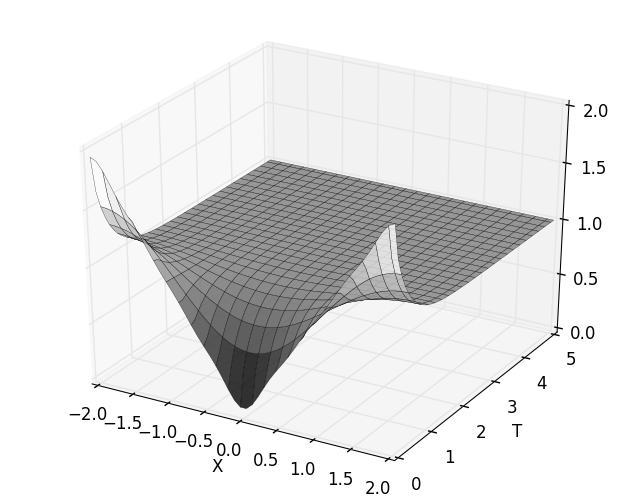

PyObject <matplotlib.text.Text object at 0x7efabdcf0860>

In [16]:
plot_surface(X'',T',z,rstride=2,edgecolors="k", cstride=2, cmap=ColorMap("gray"), 
alpha=0.8, linewidth=0.25)
xlabel("X")
ylabel("T")

### Numeričko crtanje

Pogledajmo interaktivno konvergenciju - treba nam paket `Interact.jl`:

In [17]:
using Interact

In [18]:
# Definirajmo prostor točaka (Julia nema funkciju meshgrid(), ovo je zamjena)
X=linspace(-2,2)
T=linspace(0,5)
gridX=repmat(X,1,m)
gridT=repmat(T',m,1)

50×50 Array{Float64,2}:
 0.0  0.102041  0.204082  0.306122  …  4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122  …  4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122  …  4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 0.0  0.102041  0.204082  0.306122     4.69388  4.79592  4.89796  5.0
 ⋮                                  ⋱                             

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"l",5,1:10,"d",true)

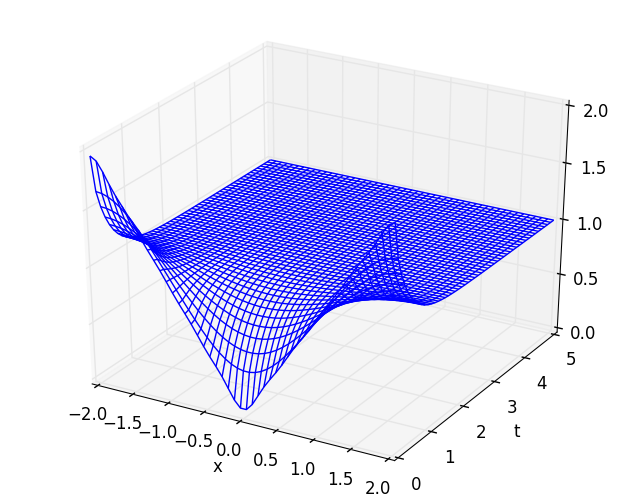

In [19]:
g=figure()
@manipulate for l=1:10; withfig(g) do
        h=1-8*sum([cos((2*k-1)*pi*gridX/2).*exp(-(2*k-1)^2*pi^2*gridT/4)/((2*k-1)^2*π^2) 
            for k in collect(1:l)]) 
        mesh(X'',T',h) # ili surf(h)
        xlabel("x")
        ylabel("t")
    end
end

## Primjer 1

$$
u_t-u_{xx}=-u \\
u(x,0)=f(x)=\begin{cases}0, \quad -1<x<0 \\ x,\quad 0<x<1 \end{cases} \\
u(-1,t)=0,\quad u(1,t)=0 
$$

Za detalje o simboličkom računanju pogledajte
[SymPy Tutorial](https://github.com/jverzani/SymPy.jl/blob/master/examples/tutorial.md).

Uvrštavanjem 

$$
u(x,t)=X(x)T(t)
$$

imamo jednadžbu 

$$
T'X-TX''=-TX,
$$

odnosno dvije jednadžbe

$$
\frac{X''}{X}=\frac{T'+T}{T}=-\lambda.
$$

Jednadžba po $T$ je populacijska jednadžba koja glasi

$$
T'=-(\lambda+1)T
$$

i čije rješenje je

$$
T=Ce^{-(\lambda+1)t}.
$$

Riješimo SLP po $X$:

$$
X''=-\lambda X, \quad X(-1)=0, \quad X(1)=0.
$$

In [38]:
F = SymFunction("F")

SymPy.SymFunction(PyObject F,0)

In [39]:
λ=symbols("λ",real=true,positive=true)
x=symbols("x")
diffeq = Eq(diff(F(x), x, 2) +λ*F(x), 0)

Eq(λ*F(x) + Derivative(F(x), x, x), 0)

In [40]:
ex = dsolve(diffeq)

Eq(F(x), C1*sin(x*sqrt(λ)) + C2*cos(x*sqrt(λ)))

In [41]:
ex1 = rhs(ex)

C1*sin(x*sqrt(λ)) + C2*cos(x*sqrt(λ))

Uvrstimo rubne uvjete:

In [42]:
ex1a=subs(ex1,x,-1)

-C1*sin(sqrt(λ)) + C2*cos(sqrt(λ))

In [43]:
ex1b=subs(ex1,x,1)

C1*sin(sqrt(λ)) + C2*cos(sqrt(λ))

In [44]:
solve(cos(sqrt(λ)),λ)

2-element Array{SymPy.Sym,1}:
   pi^2/4
 9*pi^2/4

Sustav jednadžbi je homogen i glasi

$$
\begin{bmatrix} -C_1 & C_2 \\ C_1 & C_2 \end{bmatrix} \begin{bmatrix}\sin \sqrt{\lambda} \\ \cos\sqrt{\lambda} \end{bmatrix} = \begin{bmatrix} 0\\ 0\end{bmatrix}.
$$

Trivijalno rješenje je u ovom slučaju očito nemoguće, a netrivijalna rješenje postoje kada je 
matrica sustava singularna, odnosno kada je $C_1=0$ ili $C_2=0$.

Kada je $C_1=0$ onda je $\cos\sqrt{\lambda}=0$ pa je 

$$
\lambda=\frac{2n+1}{2}\pi, \quad n=0,1,2,3,\ldots
$$

Kada je $C_2=0$ onda je $\sin\sqrt{\lambda}=0$ pa je 

$$
\lambda=n\pi, \quad n=0,1,2,3,\ldots
$$

Dakle, rješenje problema koje zadovoljava jednadžbu i rubne uvjete ima oblik:

$$
u(x,t)=\sum_{n=0}^\infty a_n \cos \bigg(\frac{2n+1}{2}\pi x\bigg)e^{-\big(\big[\frac{2n+1}{2}\pi\big]^2+1\big)t}
+ b_n \sin (n\pi x)e^{-([n\pi]^2+1)t}.
$$

Potrebno zadovoljiti još početni uvjet:

$$
u(x,0)=\sum_{n=0}^\infty a_n \cos \bigg(\frac{2n+1}{2}\pi x\bigg)
+ b_n \sin (n\pi x)=f(x).
$$
 
Radi se o razvoju u generalizirani Fourierov red funkcije f(x): 

In [45]:
p=x->piecewise((0,x<0),(x, (0<=x) && (x<=1)),(0,x>1))

(::#42) (generic function with 1 method)

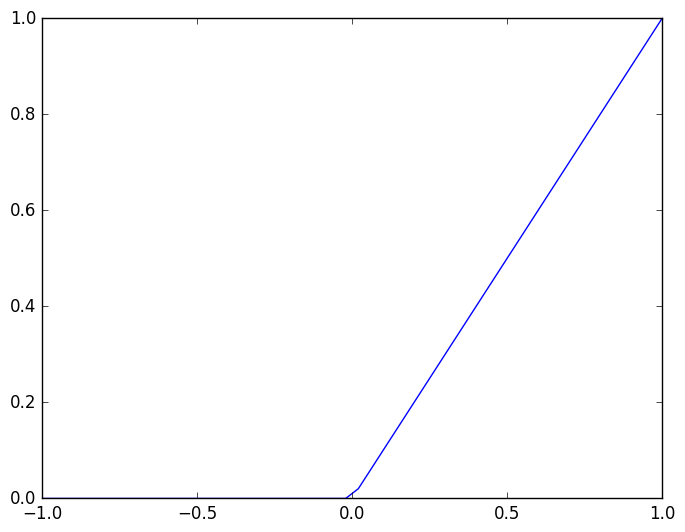

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7efabd6332b0>

In [46]:
x=linspace(-1,1)
y=[p(x[i]) for i=1:length(x)]
plot(x,y)

Provjerimo ortonormiranost svojstvenih funkcija i izračunajmo koeficijente $a_n$, $b_n$ (integriranje od $a_n$ traje duže!):

In [47]:
integrate(x->cos((2*n+1)*pi*x/2)^2,-1,1)

1

In [48]:
integrate(x->sin(n*pi*x)^2,-1,1)

Piecewise((0, Eq(pi*n, 0)), (1, True))

In [49]:
a=integrate(x->x*cos((2*n+1)*pi*x/2),0,1)

4*(-1)^n*pi*n/(4*pi^2*n^2 + 4*pi^2*n + pi^2) + 2*(-1)^n*pi/(4*pi^2*n^2 + 4*pi^2*n + pi^2) - 4/(4*pi^2*n^2 + 4*pi^2*n + pi^2)

In [50]:
N(a(0))

0.23133503779823025

In [51]:
simplify(a)

2*(2*(-1)^n*pi*n + (-1)^n*pi - 2)/(pi^2*(4*n^2 + 4*n + 1))

In [52]:
b=integrate(x->x*sin(n*pi*x),0,1)

Piecewise((0, Eq(n, 0)), (-(-1)^n/(pi*n), True))

In [53]:
b(0)

0

In [54]:
X=linspace(-1,1)
T=linspace(0,5)
m=length(X)
gridX=repmat(X,1,m)
gridT=repmat(T',m,1);

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"l",10,1:20,"d",true)

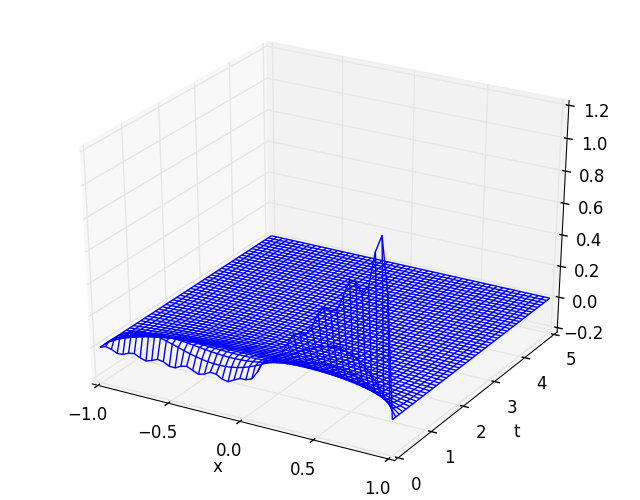

In [55]:
g=figure()
@manipulate for l=1:20; withfig(g) do
        h=sum([N(a(k))*cos((2*k+1)*pi*gridX/2).*exp(-(((2*k+1)*pi/2)^2/4+1)*gridT)+N(b(k))*sin(k*pi*gridX).*exp(-((k*pi)^2+1)*gridT) for k in collect(0:l)]) 
        mesh(X'',T',h) # ili surf(h)
        xlabel("x")
        ylabel("t")
    end
end

## Homogenizacija

U oba prethodna primjera zadani su homogeni rubni uvjeti. Ukoliko rubni uvjeti nisu homogeni, zadani problem je potrebno __homogenizirati__ kako bi mogli dobiti regularni SLP.


